In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018_mc_zrest.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in affvids_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/AffVids/wholebrain2.nii.gz', num_factors=100, embedding_dim=2)

07/08/2020 13:23:29 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
07/08/2020 13:23:38 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
07/08/2020 13:23:48 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
07/08/2020 13:23:57 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub11_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
07/08/2020 13:24:06 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub11_run01_mc_MNI_masked.nii.gz wi

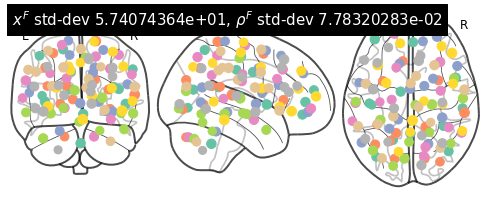

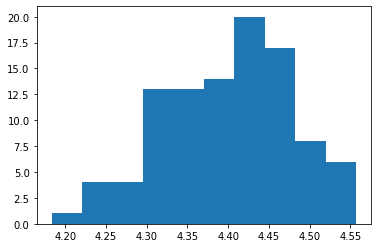

(<nilearn.plotting.displays.OrthoProjector at 0x7f570fd29650>,
 tensor([[-4.0064e+01, -2.1346e+01,  1.0489e+01],
         [ 5.5272e+01, -2.4755e+01,  3.8213e+01],
         [ 3.5281e+01, -4.3621e+01,  1.9714e+01],
         [ 3.1913e+00,  4.4664e+01, -8.8927e+00],
         [-9.7839e+00, -7.3216e+00,  3.5902e+01],
         [-1.7900e+01, -5.8164e+01,  5.9116e+01],
         [ 4.5442e-01, -5.1163e+01, -3.9636e+01],
         [ 4.0618e+01, -7.0089e+01,  1.7333e+01],
         [-3.5581e+01, -7.5978e+01, -1.7056e+00],
         [ 4.7981e+01,  7.1930e+00,  1.7433e+00],
         [-4.2794e+01, -1.9596e+01,  5.2324e+01],
         [-3.7063e+01,  4.7779e+01,  4.3030e+00],
         [-1.0615e+01,  5.6694e+01,  1.6886e+01],
         [ 2.9873e+01,  4.5335e+00,  1.6877e+01],
         [-2.0947e+01, -5.9371e+01,  1.8597e+00],
         [-1.4534e+01, -5.1035e+01,  2.1277e+01],
         [-2.8435e+01,  3.6823e+00,  5.5184e+01],
         [ 3.1548e+01, -8.1136e+01, -3.3635e+00],
         [-3.4644e+01, -4.1907e+01,  

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
dtfa.num_blocks

708

In [9]:
dtfa.num_voxels

81638

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=25, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=100,
                    blocks_filter=affvids_db.inference_filter(training=True))

07/08/2020 13:34:14 [Epoch 1] (17528ms) Posterior free-energy 7.40247880e+10 = KL from prior 2.47954880e+07 - log-likelihood -7.40000236e+10
07/08/2020 13:34:14 Saving checkpoint...
07/08/2020 13:34:32 [Epoch 2] (17476ms) Posterior free-energy 7.20776479e+10 = KL from prior 1.18405190e+07 - log-likelihood -7.20657940e+10
07/08/2020 13:34:48 [Epoch 3] (16687ms) Posterior free-energy 7.05882767e+10 = KL from prior 6.74659150e+06 - log-likelihood -7.05815429e+10
07/08/2020 13:35:05 [Epoch 4] (16700ms) Posterior free-energy 6.95021568e+10 = KL from prior 4.16198950e+06 - log-likelihood -6.94980035e+10
07/08/2020 13:35:22 [Epoch 5] (16615ms) Posterior free-energy 6.87313060e+10 = KL from prior 2.53226625e+06 - log-likelihood -6.87287828e+10
07/08/2020 13:35:38 [Epoch 6] (16679ms) Posterior free-energy 6.81302221e+10 = KL from prior 1.86242900e+06 - log-likelihood -6.81283666e+10
07/08/2020 13:35:55 [Epoch 7] (16672ms) Posterior free-energy 6.76278927e+10 = KL from prior 1.46307250e+06 - log

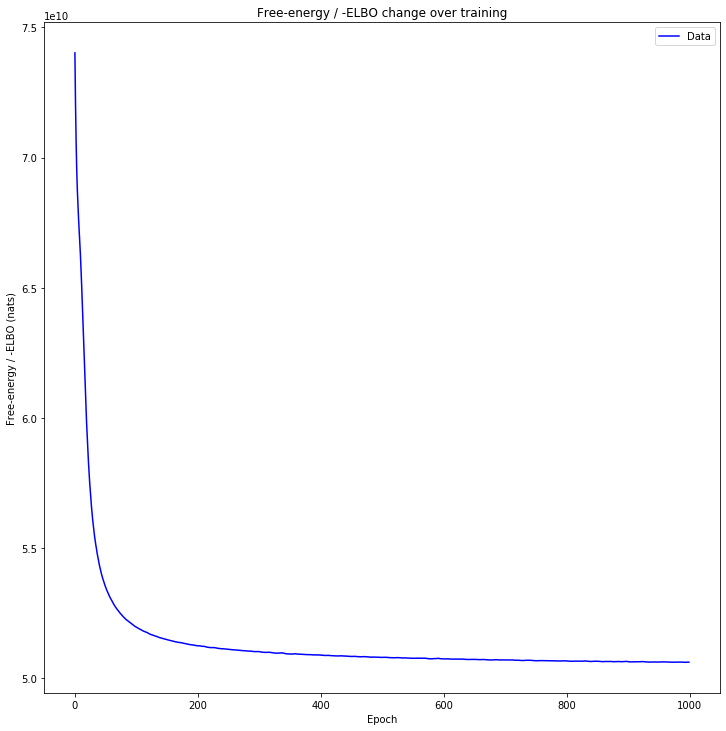

In [11]:
utils.plot_losses(losses)

In [12]:
def task_labeler(task):
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


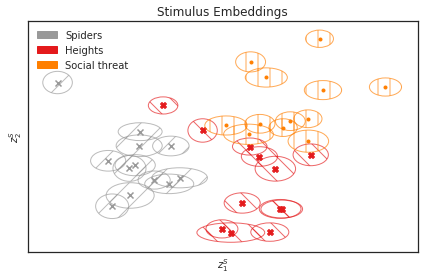

In [13]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='affvids_norest_task_embedding.pdf')

In [14]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


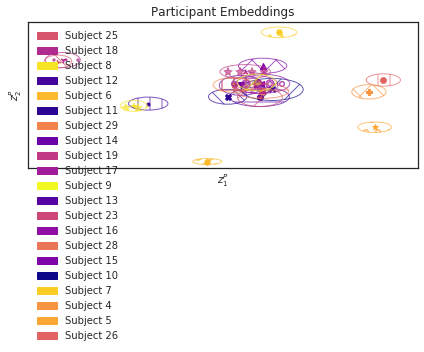

In [15]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [16]:
def block_task_labeler(b):
    task = b.task
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

07/08/2020 18:12:11 Plotting factors for Participant 7, run 2


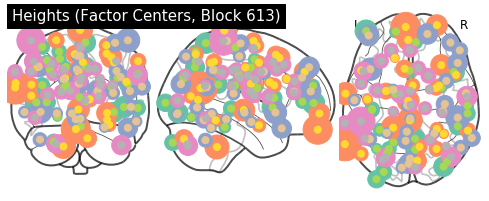

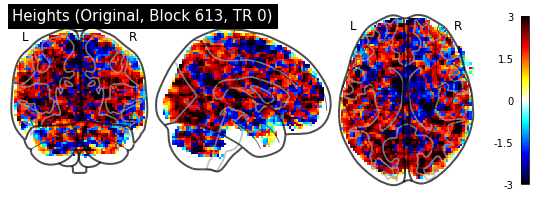

07/08/2020 18:12:15 Reconstruction Error (Frobenius Norm): 1.54320053e+02 out of 1.30442273e+03


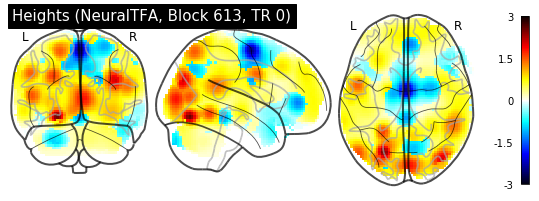

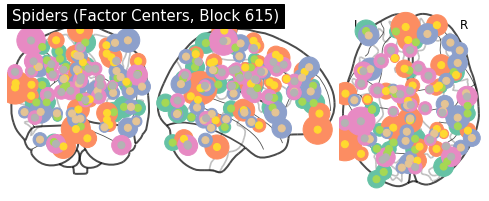

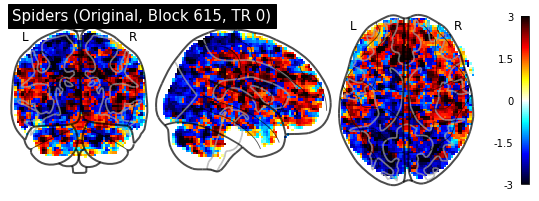

07/08/2020 18:12:20 Reconstruction Error (Frobenius Norm): 2.05926193e+02 out of 1.33834436e+03


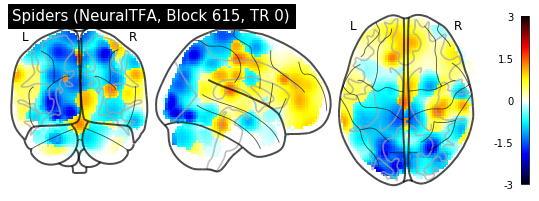

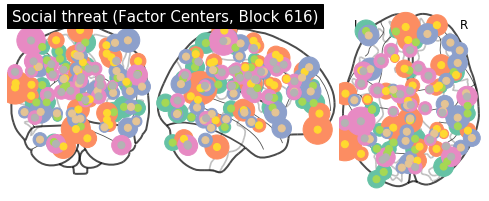

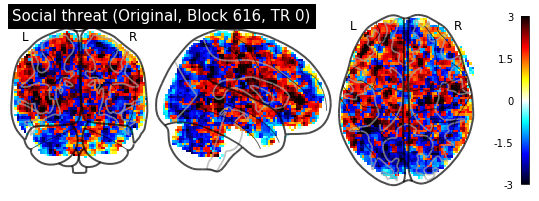

07/08/2020 18:12:24 Reconstruction Error (Frobenius Norm): 2.05132965e+02 out of 1.43787317e+03


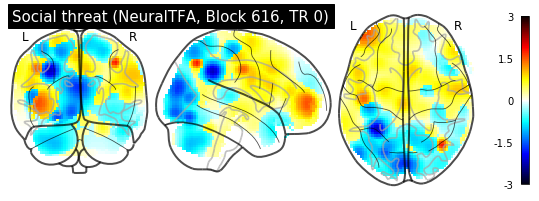

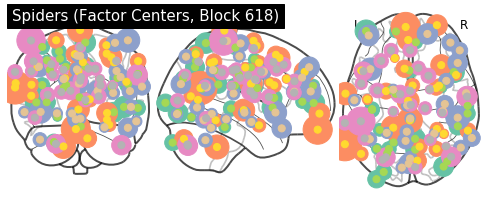

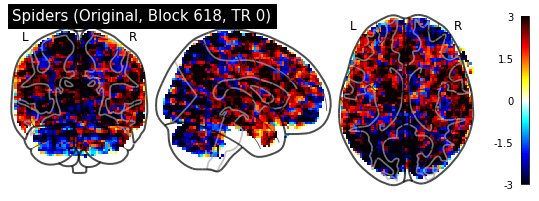

07/08/2020 18:12:29 Reconstruction Error (Frobenius Norm): 2.24787476e+02 out of 1.52667554e+03


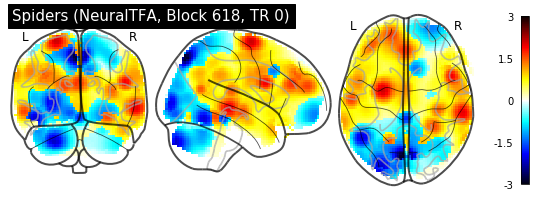

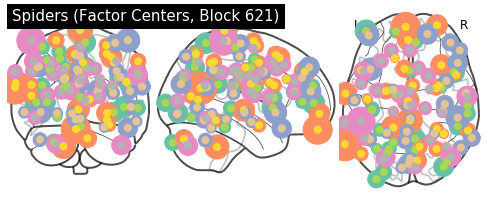

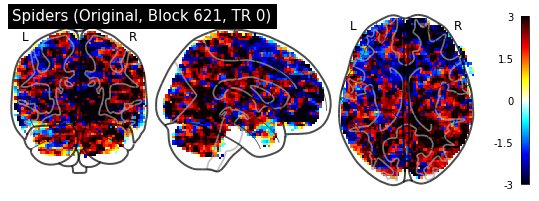

07/08/2020 18:12:33 Reconstruction Error (Frobenius Norm): 1.68696548e+02 out of 1.40607410e+03


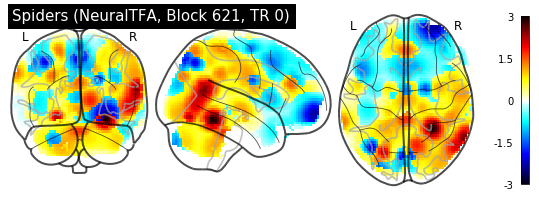

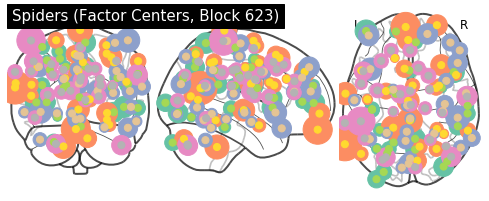

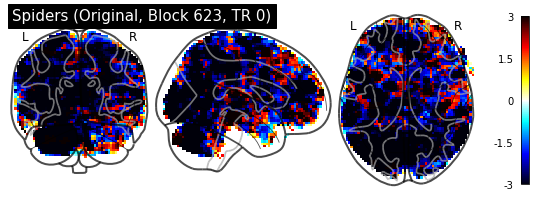

07/08/2020 18:12:38 Reconstruction Error (Frobenius Norm): 3.34693542e+02 out of 1.55214832e+03


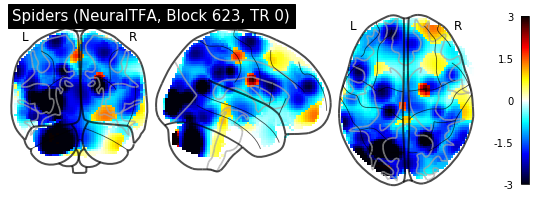

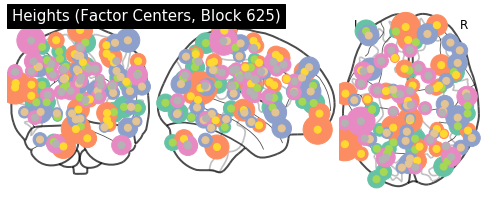

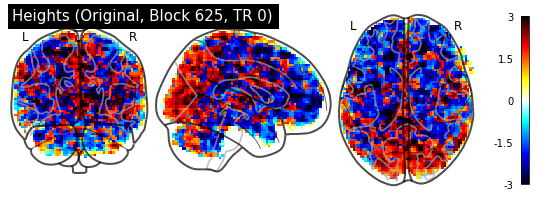

07/08/2020 18:12:43 Reconstruction Error (Frobenius Norm): 1.39447403e+02 out of 1.24685510e+03


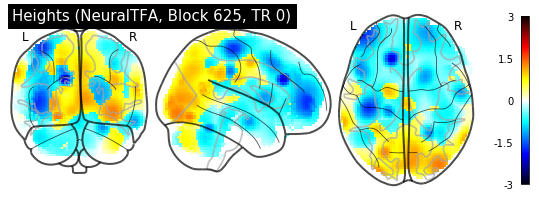

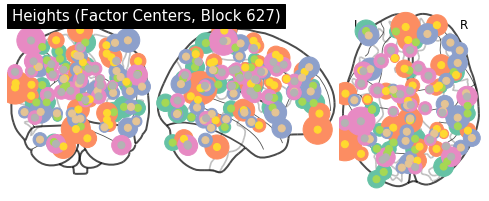

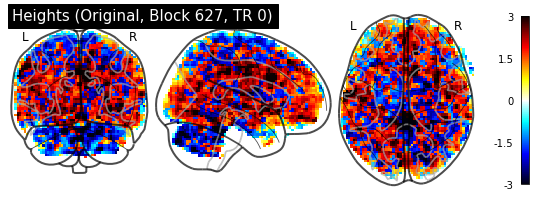

07/08/2020 18:12:47 Reconstruction Error (Frobenius Norm): 1.79697723e+02 out of 1.32294067e+03


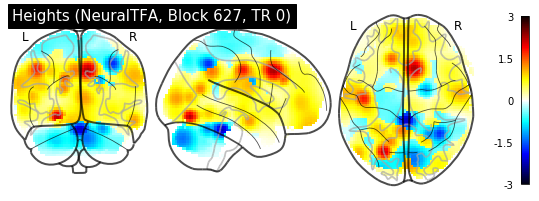

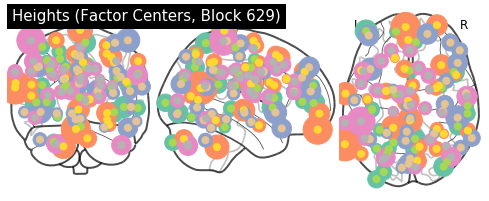

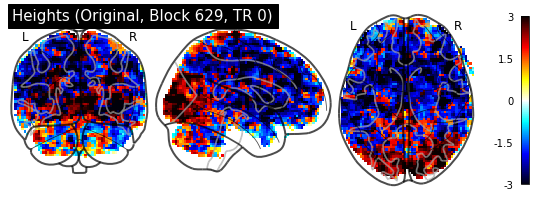

07/08/2020 18:12:52 Reconstruction Error (Frobenius Norm): 1.75990402e+02 out of 1.37790063e+03


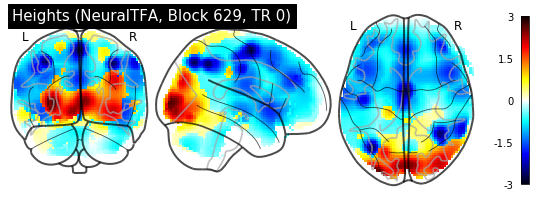

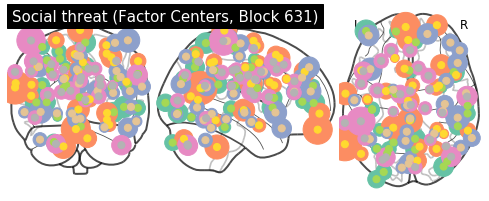

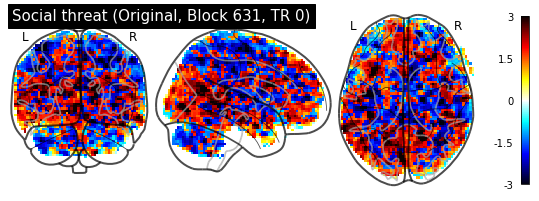

07/08/2020 18:12:56 Reconstruction Error (Frobenius Norm): 1.37031586e+02 out of 1.32418530e+03


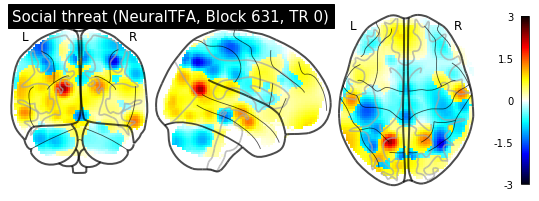

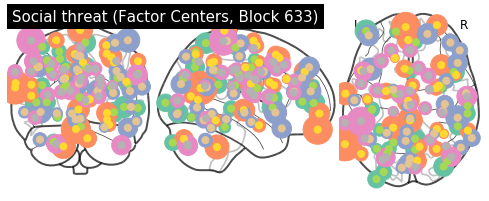

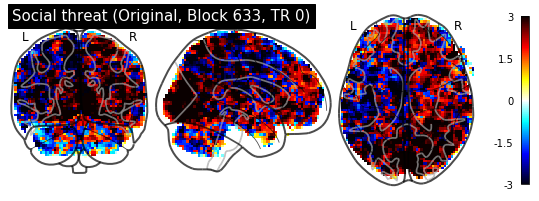

07/08/2020 18:13:01 Reconstruction Error (Frobenius Norm): 1.78315506e+02 out of 1.38168286e+03


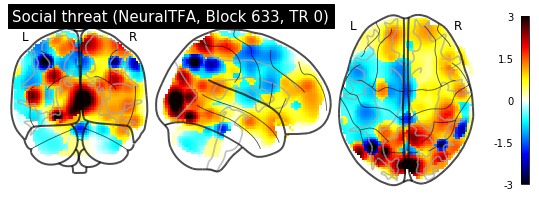

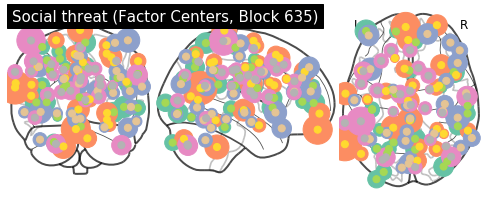

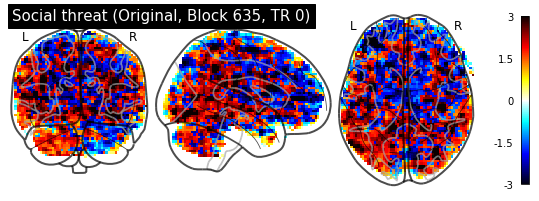

07/08/2020 18:13:06 Reconstruction Error (Frobenius Norm): 1.35929291e+02 out of 1.48441492e+03


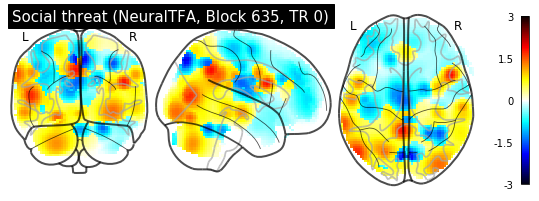

In [17]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

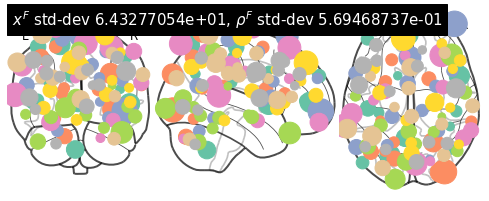

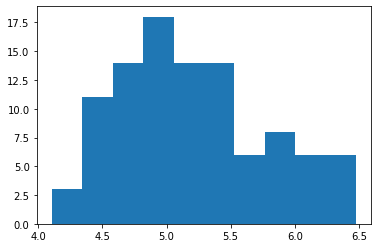

(<nilearn.plotting.displays.OrthoProjector at 0x7f56c0041bd0>,
 tensor([[-3.2716e+01, -2.9620e+01,  2.4837e+01],
         [ 4.8648e+01, -2.8051e+01,  5.1199e+01],
         [ 4.2094e+01, -4.3988e+01,  1.7329e+01],
         [-2.0593e+00,  5.2696e+01,  4.1165e+00],
         [-1.2833e+01,  9.3046e+00,  3.7772e+01],
         [-2.1154e+01, -7.4113e+01,  6.4009e+01],
         [-5.2429e+00, -5.5861e+01, -4.6234e+01],
         [ 4.3023e+01, -6.8097e+01,  3.3875e+01],
         [-4.9902e+01, -8.1992e+01,  3.1554e+00],
         [ 5.1941e+01,  9.1238e+00,  1.8306e+00],
         [-4.4266e+01, -2.5011e+01,  6.1966e+01],
         [-4.4816e+01,  4.8071e+01,  5.6764e+00],
         [-9.0465e+00,  6.2195e+01,  3.1638e+01],
         [ 1.9873e+01,  6.1580e+00,  1.7416e+01],
         [-2.6212e+01, -6.9769e+01, -1.3368e+01],
         [-1.6955e+01, -6.0625e+01,  1.8344e+01],
         [-2.5816e+01,  2.9710e+00,  6.1829e+01],
         [ 3.6380e+01, -9.1675e+01, -4.0068e+00],
         [-3.1203e+01, -3.7708e+01,  

In [18]:
dtfa.visualize_factor_embedding()

In [19]:
dtfa.average_reconstruction_error()

07/08/2020 18:13:47 Average reconstruction error (MSE): 9.59036251e-01
07/08/2020 18:13:47 Average data norm (Euclidean): 1.09839495e+00
07/08/2020 18:13:47 Percent average reconstruction error: 0.307660


(0.9590362514115088, 1.0983949463766804, 0.0030765964692849685)

In [20]:
dtfa.average_reconstruction_error(weighted=False)

07/08/2020 18:14:26 Average reconstruction error (MSE): 1.23333894e+03 +/- 5.53985157e+01
07/08/2020 18:14:26 Average data norm (Euclidean): 1.41168145e+03 +/- 8.14817650e+01
07/08/2020 18:14:26 Percent average reconstruction error: 87.494786 +/- 3.52307182e+00


(array([1253.10302734, 1179.61560059, 1280.50195312, 1265.80895996,
        1232.90612793, 1288.19897461, 1183.13720703, 1270.48413086,
        1233.2668457 , 1211.72180176, 1282.23986816, 1306.88781738,
        1188.24621582, 1241.09484863, 1262.59326172, 1208.79125977,
        1245.63476562, 1235.74365234, 1250.45800781, 1245.07751465,
        1245.7956543 , 1255.70080566, 1240.90686035, 1251.38378906,
        1243.21875   , 1307.35351562, 1192.55944824, 1314.46032715,
        1299.58642578, 1292.36755371, 1266.76037598, 1237.06213379,
        1209.94055176, 1208.79504395, 1214.48901367, 1249.0501709 ,
        1206.00488281, 1255.31494141, 1222.79833984, 1171.13928223,
        1237.07995605, 1343.52172852, 1232.09423828, 1448.98046875,
        1227.14916992, 1327.2590332 , 1399.32824707, 1226.02990723,
        1203.5994873 , 1154.59204102, 1229.73669434, 1254.74328613,
        1237.25244141, 1344.10229492, 1227.12353516, 1298.50549316,
        1243.04992676, 1191.18688965, 1214.43579

In [21]:
def subject_task_blocks(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label and task_labeler(b.task) == task_label:
            yield b

In [22]:
def subject_blocks(subject_label, subject_labeler=subject_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label:
            yield b

In [23]:
def subject_fear_ratings(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [24]:
def subject_task_fear_ratings(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in subject_task_blocks(subject_label, task_label, subject_labeler, task_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [25]:
def fear_labeler(subject, task, task_labeler=task_labeler, threshold=0.5):
    subject_ratings = [rating for rating in subject_task_fear_ratings(subject, task, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Afraid of %s' % task
        return 'Unafraid of %s' % task
    result = np.mean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [26]:
def subject_fear_labeler(subject, threshold=0.5):
    subject_ratings = [rating for rating in subject_fear_ratings(subject, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Fearful'
        return 'Not fearful'
    result = np.nanmean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [27]:
def subject_average_fear_labeler(subject):
    return subject_fear_labeler(subject, threshold=None)

In [28]:
def heights_fear_labeler(subject):
    return fear_labeler(subject, 'Heights', threshold=None)

In [29]:
def spiders_fear_labeler(subject):
    return fear_labeler(subject, 'Spiders', threshold=None)

In [30]:
def social_threat_fear_labeler(subject):
    return fear_labeler(subject, 'Social threat', threshold=None)

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


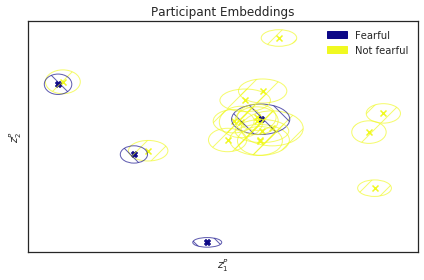

In [31]:
dtfa.scatter_subject_embedding(labeler=subject_fear_labeler, figsize=None, colormap='plasma')

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


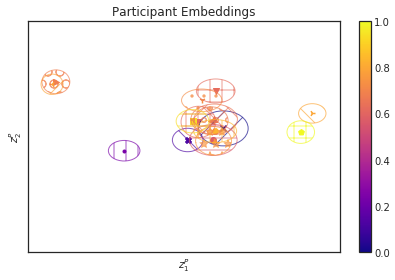

In [32]:
dtfa.scatter_subject_embedding(labeler=heights_fear_labeler, figsize=None, colormap='plasma')

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


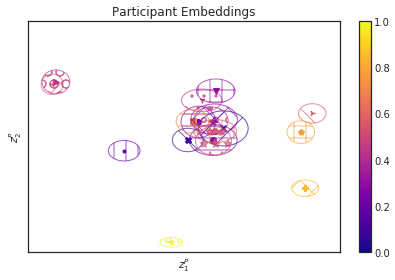

In [33]:
dtfa.scatter_subject_embedding(labeler=spiders_fear_labeler, figsize=None, colormap='plasma')

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


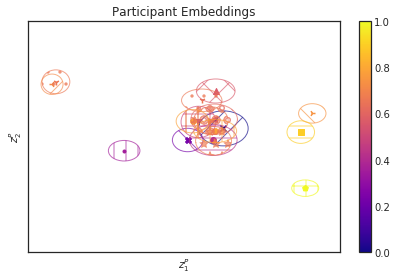

In [34]:
dtfa.scatter_subject_embedding(labeler=social_threat_fear_labeler, figsize=None, colormap='plasma')

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


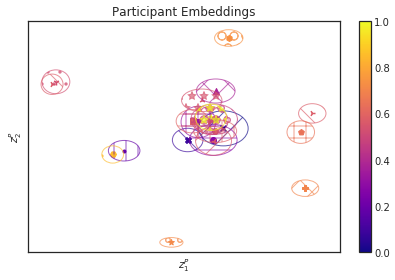

In [35]:
dtfa.scatter_subject_embedding(labeler=subject_average_fear_labeler, figsize=None, colormap='plasma',
                               filename='affvids_norest_subject_embedding.pdf')